# **Riduzione della Dimensionalità**

## Dataset MNIST_784: Panoramica

Il dataset **MNIST_784** è un dataset molto popolare di cifre scritte a mano, ampiamente utilizzato in machine learning e deep learning per **classificazione di immagini**.

## Caratteristiche Chiave:
**Tipo di dati**: Immagini

* **Contenuto**: Cifre scritte a mano (da 0 a 9)

* **Numero di Campioni**: 70.000 immagini

* **Dimensione Immagine**: 28x28 pixel (appiattite in 784 caratteristiche per campione) 

* **Caratteristiche delle Immagini**: Ogni immagine è rappresentata come un array 1D di 784 valori di intensità dei pixel (scala di grigi)

* **Classi**: 10 classi (cifre da 0 a 9).

Il dataset può essere accessibile direttamente attraverso piattaforme come `scikit-learn`

## Perché "784"?

Il nome "mnist_784" fa riferimento ai 784 pixel che compongono l' immagine. Supponendo infatti di calcolare quanti pixel contiene la singola immagine troviamo che:

**28 x 28 = 784**


Digitalmente un' immagine è una **matrice** contenente valori numerici discreti nell' intervallo [0, 255] che rappresentano **l' intensità del pixel** in scala di grigi. 

Per quanto riguarda le immagini a colori viene introdotta una terza dimensione che è il **canale**. Tipicamente un' immagine a colore è in formato **RGB (Red, Green, Blue)** e possiede 3 canali. 

Un pixel sarà quindi la combinazione del valore di Rosso, Verde e Blu per quel singolo pixel.

Nel caso del dataset **mnist_784** ogni singola immagine viene considerata come vettore unidimensionale (1D), in cui tutti i pixel vengono allineati.

Per semplicità consideriamo un' immagine di risoluzione 3x3:

```
 [255, 128, 64]
 [ 0, 128, 192]
 [ 64, 255,  0]
```

Se trasformo l' immagine in un vettore unidimensionale ottengo:

```
[255, 128, 64, 0, 128, 192, 64, 255, 0]
```

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml

# 1: Carichiamo il dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False,parser='auto')
X = mnist.data
y = mnist.target.astype(int)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 0 4 ... 4 5 6]


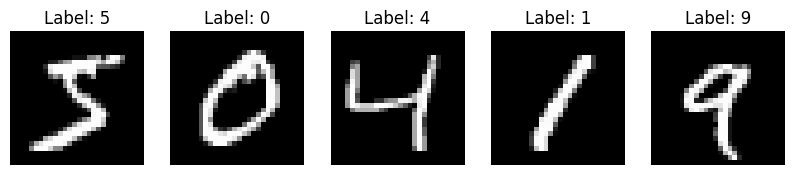

In [2]:
import matplotlib.pyplot as plt

# Funzione per stampare alcune immagini
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images): 
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray') 
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.show()

# Decidiamo il numero di immagini da visualizzare e stampiamole utilizzando la funzione display_images
num_samples = 5
display_images(X[:num_samples], y[:num_samples], num_images=num_samples)


### **Metodo `.shape`**

Un metodo molto utile degli array, soprattutto nel caso di array molto grandi, è:

- [numpy.shape](https://numpy.org/doc/2.1/reference/generated/numpy.shape.html): Stampa le dimensioni di un array.

In [3]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

a.shape

(2, 5)

## **Principal Component Analysis (PCA)**

La **PCA** è una tecnica utilizzata per ridurre la dimensionalità dei dati preservando la maggior parte della variazione presente nel dataset originale. 

L'obiettivo della PCA è trasformare i dati in un nuovo sistema di coordinate, in cui le prime componenti principali catturano la maggior parte della varianza. Questo può semplificare l'analisi e la visualizzazione dei dati, riducendo il rumore e migliorando l'efficienza computazionale.

### **Come si usa la PCA?**

Per applicare la PCA ci sono degli step da seguire:

1. **Standardizzazione dei dati**: Per rendere le features comparabili tra loro viene eseguita la standardizzazione.

2. **Calcolo della matrice della covarianza**: rappresente la variazione di ogni variabile rispetto alle altre (inclusa se stessa).

3. **Calcolo degli autovalori e autovettori**: Vengono calcolati gli autovalori della matrice di covarianza, che rappresentano la varianza espressa dalle componenti principali, e gli autovalori, che rappresentano le direzioni delle componenti principali. 

4. **Ordinamento**: Si ordnano gli autovalori (e i corrispettivi autovettori) in ordine decresente in base alla varianza espressa.

5. **Selezione delle top-n componenti**: Si scelgono il numero di componenti desiderato che più esprimono varianza.

6. **Trasformazione dei dati**: SI proiettano i dati lungo le componenti principali scelte, ottenendo la riduzione di dimensione desiderata.

## **Step 1 - Standardizzazione**

Per standardizzare i dati applichiamo la **Z-normalization** che consiste nel trasformare i dati in modo che abbiano:

    - media = 0
    - deviazione standard = 1

Per fare ciò utilizzeremo le funzioni di numpy:

- [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html): Calcola la media lungo un asse specifico.
- [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html): Calcola la deviazione standard lungo un asse specifico.

### **Broadcasting**

Prima di procedere però osserviamo una proprietà fondamentale che offre NumPy. 

In [4]:
prezzi = np.array([100, 200, 300, 400])  # Array NumPy
sconto = 0.10  # Valore scalare

prezzi_scontati = prezzi - prezzi * sconto  # Broadcasting automatico

print(prezzi_scontati)

[ 90. 180. 270. 360.]


In [42]:
voti = np.array([[80, 85, 90], 
                 [75, 80, 95], 
                 [60, 70, 80]])  # 3 studenti con 3 voti ciascuno

bonus = np.array([5, 10, 15])  # Bonus per ogni materia

voti_finali = voti + bonus  # Broadcasting applicato!

print(voti_finali)

[[ 85  95 105]
 [ 80  90 110]
 [ 65  80  95]]


Notiamo inoltre come in alcune funzioni di NumPy è possibile specificare l' **asse** lungo cui applicarle. Specificando l' asse tra gli argomenti della funzione possiamo ottenere diversi risultati.

In [43]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

# Calcoliamo la media di A

mean_A = np.mean(A, axis=0) # axis = 0 indica che vogliamo calcolare la media sulle colonne
                            # axis = 1 indica che vogliamo calcolare la media sulle righe
                            # axis = None indica che vogliamo calcolare la media su tutti gli elementi

print(f'Media di A: {mean_A}')

Media di A: [4. 5. 6.]


In [22]:
# Calcoliamo la media dei dati
# svolgimento...


mean_X = np.mean(X, axis=0) 
print ({len(mean_X)})
print(f'Media di X: {mean_X}')

# Sottraggo la media da ogni riga di X
# svolgimento...
X_centrata = X - mean_X
print(X_centrata.shape)


# Calcoliamo la deviazione standard dei dati centrati
# svolgimento...
X_std = np.std(X_centrata, axis = 0)
print (X_std)

# Per standardizzare i dati utilizzo la formula: dati_centrati / deviazione_standard + 1e-6
# 1e-6 è un valore piccolo aggiunto per evitare divisioni per zero
# svolgimento...
X_standardizzata = X_centrata / (X_std + 1e-6)
print (X_standardizzata)

{784}
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.40061249e-01 1.26020885e+00 8.16397430e-01 3.40165596e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.04738837e-02 2.30430542e-01 1.32273535e+00 2.02952401e+00
 2.95101239e+00 3.24199632e+00 4.82037862e+00 5.67715008e+00
 6.05192338e+00 5.89715515e+00 6.24349860e+00 5.92008489e+00
 5.61973006e+00 5.26610197e+00 4.32835099e+00 3.68131215e+00
 3.03281531e+00 1.79894620e+00 1.12138799e+00 7.46739177e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.41895535e-01 1.20117490e-01
 7.55007246e-01 1.01973118e+00 3.06594456e+00 4.97614454e+00
 7.12516841e+00 9.

## **Step 2 - Calcolo della matrice di covarianza**

Per calcolare la matrice di covarianza utilizziamo la funzione di NumPy:

- [numpy.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html): Calcola la matrice di covarianza dei dati.

In [23]:
# Calcoliamo la matrice di covarianza utilizzando la funzione np.cov a cui dobbiamo passare come parametro i dati standardizzati.
# N.B. la funzione np.cov richiede di default tratta le righe come variabili e le colonne come osservazioni
# nel nostro caso vogliamo fare il contrario, quindi dobbiamo specificare il parametro rowvar=False

# svolgimento...
cov_matrix = np.cov(X_standardizzata,rowvar=False)
print (cov_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## **Step 3 - Calcolo degli autovalori e autovettori**

Per calcolare autovalori e autovettori utilizziamo la funzione di NumPy:

- [numpy.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html): Calcola autovalori e autovettori di una matrice simmetrica.

In [24]:
# Calcoliamo gli autovalori e autovettori della matrice di covarianza. Utilizziamo la funzione np.linalg.eigh a cui passiamo come parametro la matrice di covarianza.

# N.B. la funzione np.linalg.eigh restituisce una tupla con due elementi, rispettivamente:
# - un array con gli autovalori in ordine crescente
# - una matrice con gli autovettori corrispondenti
# a noi interessa salvarli entrambi in due variabili distinte

autovalori, autovettori = np.linalg.eigh (cov_matrix)
print (autovalori)
print (autovettori)
# svolgimento...


[-2.29334923e-15 -1.33795804e-15 -1.06950541e-15 -9.23683361e-16
 -6.36049693e-16 -5.13736664e-16 -4.91925564e-16 -3.56907009e-16
 -3.24622958e-16 -2.94248962e-16 -1.69523659e-16 -1.13456742e-16
 -1.07257169e-16 -6.80545091e-17 -3.77441398e-17 -3.06313731e-17
 -1.33487450e-17 -7.32180446e-18 -6.07869857e-18 -4.18299759e-18
 -1.80346418e-18 -1.23690645e-19 -1.95419467e-32 -7.53791196e-33
 -3.39965386e-33  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00591008e-33  3.28107318e-33  2.17030684e-32
  1.02894059e-18  3.82164821e-18  7.00358492e-18  8.52164922e-18
  1.33619068e-17  1.59637839e-17  2.29969658e-17  7.95225369e-17
  9.53273657e-17  1.31607705e-16  1.92397044e-16  2.09775106e-16
  3.10050939e-16  3.35690784e-16  4.52229012e-16  5.77393387e-16
  6.60861484e-16  7.25240

## **Step 4 - Ordinare gli autovalori e autovettori**

Per ordinare gli autovalori e autovettori in ordine decrescente utilizziamo la funzione di NumPy:
- [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html): Ritorna gli indici degli autovalori ordinati in ordine crescente.

Poichè a noi interessa l' ordine decrescente, dobbiamo invertire questi indici. Vediamo di seguito un modo veloce e compatto per farlo.

In [50]:
lista = [1, 2, 3, 4, 5]

# La notazione di slicing [::-1] segue il ormato [start:stop:step]:
# - start: indice di partenza
# - stop: indice di fine
# - step: passo
# Se non specifico start e stop, vengono considerati tutti gli elementi
# Se specifico step = -1, vengono considerati gli elementi in ordine inverso

lista_invertita = lista[::-1]

print("Lista originale:", lista)
print("Lista invertita:", lista_invertita)

Lista originale: [1, 2, 3, 4, 5]
Lista invertita: [5, 4, 3, 2, 1]


In [35]:
# Sulla base dell' esempio fatto sopra e con la funzione np.argsort ordiniamo in ordine decrescente gli autovalori.
# Lo stesso ordinamento deve essere poi eseguito anche sugli autovettori.

# Estraiamo gli indici degli autovalori ordinari in ordine decrescente
# svolgimento...
autovalori_decrescenti = autovalori [::-1]
indici = np.argsort(autovalori_decrescenti)
print (indici)

# Ordiniamo gli autovalori utilizzando i nuovi indici
# svolgimento...
autovalori_ordinati = autovalori [indici]
print (autovalori_ordinati)


# Ordiniamo gli autovettori utilizzando i nuovi indici
# N.B. Nella matrice degli autovalori ogni colonna rappresenta un autovettore, quindi dobbiamo ordinare le colonne e non le righe. 
# svolgimento...
autovettori_ordinati = autovettori [:, indici]
print (autovettori_ordinati)


[783 782 781 780 779 778 777 776 775 774 773 772 771 770 769 768 767 766
 765 764 763 762 761 760 759 743 744 745 746 747 748 749 753 751 750 758
 757 754 755 752 756 742 741 740 739 738 737 736 735 734 733 732 731 730
 729 728 727 726 725 724 723 722 721 720 719 718 717 716 715 714 713 712
 711 710 709 708 707 706 705 704 703 702 701 700 699 698 697 696 695 694
 693 692 691 690 689 688 687 686 685 684 683 682 681 680 679 678 677 676
 675 674 673 672 671 670 669 668 667 666 665 664 663 662 661 660 659 658
 657 656 655 654 653 652 651 650 649 648 647 646 645 644 643 642 641 640
 639 638 637 636 635 634 633 632 631 630 629 628 627 626 625 624 623 622
 621 620 619 618 617 616 615 614 613 612 611 610 609 608 607 606 605 604
 603 602 601 600 599 598 597 596 595 594 593 592 591 590 589 588 587 586
 585 584 583 582 581 580 579 578 577 576 575 574 573 572 571 570 569 568
 567 566 565 564 563 562 561 560 559 558 557 556 555 554 553 552 551 550
 549 548 547 546 545 544 543 542 541 540 539 538 53

## **Step 5 - Selezionare le top-n componenti**

Selezioniamo le top-n componenti che esprimono maggiore varianza nel dataset. In generale, per avere una migliore rappresentazione grafica del dataset si scelgono le migliori 2 componenti.

In [58]:
# Selezioniamo il numero di componenti che vogliamo mantenere
n_components = 2

# Selezionare gli autovettori corrispondenti 
# ATTENZIONE: valutiamo correttamente come fare lo slicing. Dobbiamo utilizzare gli indici selezionati 
# per selezionare gli autovettori corrispondenti
# svolgimento...

autovalori_selezionati = autovettori_ordinati[:, :n_components]
print (autovalori_selezionati)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### **Calcoliamo la varianza espressa**

Calcoliamo quanta varianza viene espressa dal numero di componenti che abbiamo scelto.

In [57]:
# Per calcolare la percentuale di varianza espressa diviamo gli autovalori selezionati 
# per la somma di tutti gli autovalori 
# Per calcolare la somma di tutti gli autovalori potrebbe essere utile utilizzare la funzione sum()
somma = np.sum(autovalori)
print (somma)
prcnt = (autovalori_selezionati / somma) *100

print (prcnt)
# svolgimento...


719.0095810242879
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## **Step 6 - Transformare i dati**

Riduciamo la dimensione del dataset proiettando i dati lungo le componenti principali che abbiamo calcolato. Per ottenere questo risultato utilizziamo la funzione di NumPy:

- [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html): Calcola il prodotto riga colonna di due array.

In [54]:
# Proiettiamo i dati nello spazio delle componenti principali utilizzando np.dot a cui dobbiamo 
# passare come parametri i dati, e le direzioni lungo cui proiettare.
# N.B. Dobbiamo proiettare i dati standardizzati
X_proiettati = np.dot (X_standardizzata, autovettori_ordinati)
print (X_proiettati)
# svolgimento...

[[-8.91719776e-01  4.92971072e+00 -9.30375094e-02 ...  2.50168848e-14
   1.15392261e-14 -5.75341785e-14]
 [ 8.81353005e+00  7.51756036e+00 -3.71418488e+00 ... -2.87216163e-14
   1.30289605e-14  6.64108788e-14]
 [ 2.20483514e+00 -9.82446013e+00 -5.75248719e+00 ...  2.77913988e-14
  -2.10743342e-14 -1.44878421e-14]
 ...
 [-5.22259487e+00  1.18431573e+00 -4.75472549e+00 ... -1.71041320e-15
   8.85594768e-15 -1.63578198e-14]
 [-2.17772854e+00  6.99503232e+00 -3.22873665e+00 ...  1.18330938e-16
  -1.54766797e-14 -5.52211958e-14]
 [ 1.17778716e+01  5.40298103e+00  2.32272501e+00 ...  5.61954566e-15
   2.11774039e-14 -4.67190721e-14]]


## **Visualizzazione dei dati** 

Utilizzando la libreria `matplotlib` per visualizzare i dati trasformati

In [66]:
def plot_pca_2d(X_transformed, y, explained_variance):
    """
    Funzione per visualizzare i dati trasformati in 2D con PCA.

    Parametri:
    - X_transformed: array numpy con le prime due componenti principali (n_samples, 2)
    - y: array numpy contenente le etichette delle classi
    - explained_variance: float, percentuale di varianza spiegata dalle due componenti principali
    
    Output:
    - Un grafico scatter delle immagini nello spazio PCA 2D.
    """
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f"2D plot of Images using PCA with {explained_variance*100:.2f}% variance")
    plt.show()


TypeError: unsupported format string passed to numpy.ndarray.__format__

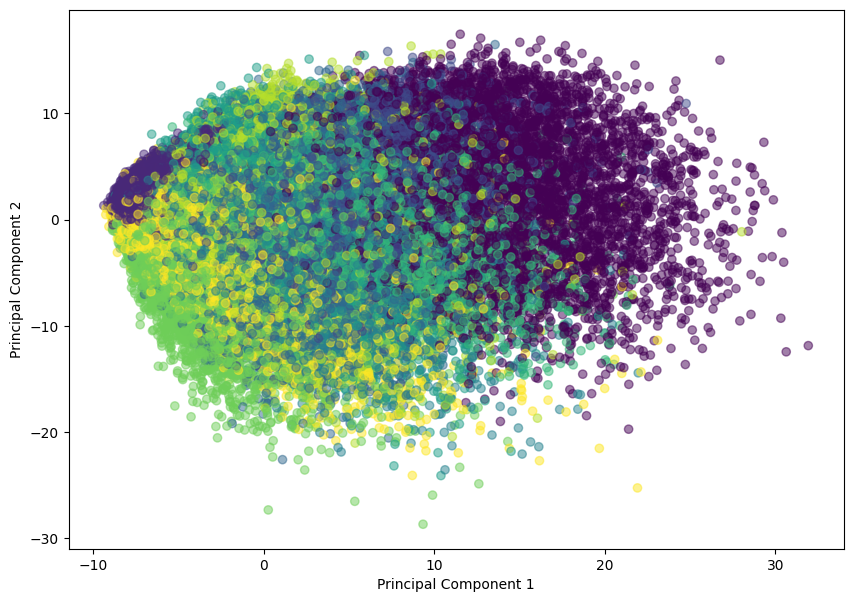

In [67]:
# Chiamare la funzione plot_pca_2d per visualizzare i dati trasformati in 2D
plot_pca_2d(X_proiettati, y, prcnt)
# svolgimento...

In [60]:
def plot_pca_with_images(X, X_transformed, y):
    """
    Funzione per visualizzare le immagini proiettate nello spazio delle prime due componenti principali della PCA.

    Parametri:
    - X: array numpy (n_samples, n_features), dataset originale con le immagini appiattite
    - X_transformed: array numpy (n_samples, 2), dataset proiettato sulle prime due componenti principali della PCA
    - y: array numpy contenente le etichette delle classi
    - image_shape: tuple, dimensione originale delle immagini (default: (28, 28) per MNIST)
    - N: int, numero massimo di immagini da visualizzare per classe (default: 20)
    - save_path: str, se fornito, salva il grafico in un file con il percorso specificato
    
    Output:
    - Un grafico con le immagini sovrapposte alla rappresentazione PCA.
    """

    N = 20
    image_shape=(28, 28)
    plt.figure(figsize=(8, 6))
    
    num_classes = len(np.unique(y))
    image_size = 1.5  # Dimensione delle immagini nel plot
    
    for i in range(num_classes):
        indices = y == i
        images = X[indices]
        points = X_transformed[indices]
        
        images = images[:N]
        points = points[:N]
        
        for image, point in zip(images, points):
            image = image.reshape(image_shape)
            plt.imshow(image, extent=(point[0] - image_size / 2, point[0] + image_size / 2,
                                      point[1] - image_size / 2, point[1] + image_size / 2),
                       cmap='gray', aspect='auto')
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.xlim(-10, 27)
    plt.ylim(-17, 15)
    
    plt.show()



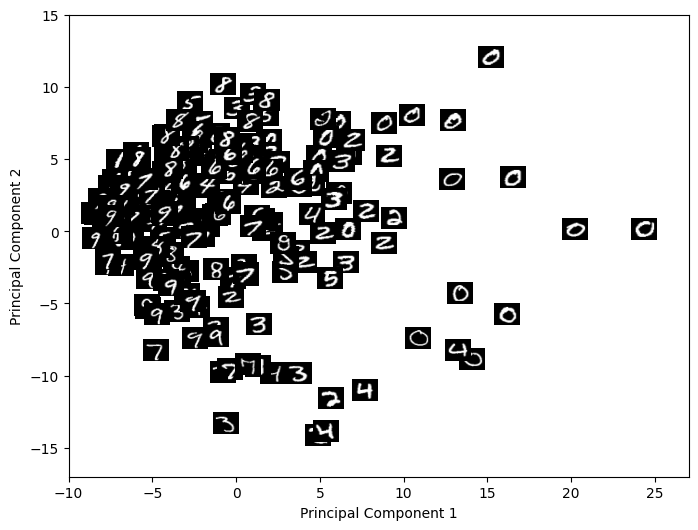

In [63]:
# Chiamare la funzione plot_pca_with_images per visualizzare le immagini proiettate nello spazio delle prime due componenti principali della PCA

plot_pca_with_images(X, X_proiettati, y)
# svolgimento...

## **PCA con scikit-learn**

Possiamo applicare la PCA anche utilizzando il pacchetto `scikit-learn`. Con quest' ultimo infatti l' intero processo visto precedentemente è parecchio semplificato. 

Gli step da seguire in questo caso sono:

1. **Caricare e standardizzare i dati**

2. **Applicare PCA**

3. **Calcolare la varianza espressa**

4. **Visualizzare i dati nel nuovo spazio**

## **Step 1 - Caricare e standardizzare i dati**

Per caricare i dati la procedura è uguale a quanto fatto in precedenza. Per quanto riguardala standardizzazione invece utilizzeremo direttamente l'oggetto di `scikit-learn`:

- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Standardizza i dati rimuovendo la media e scalandoli a varianza unitaria. 

In [71]:
# Carichiamo il dataset.
from sklearn.preprocessing import StandardScaler
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data       
y = mnist.target.astype(int)  

# Inizializziamo un' istanza di `StandardScaler`, non è necessario specificare alcun parametro.
# svolgimento...
scaler = StandardScaler()
# Utilizziamo lo scaler sui nostri dati. 
# Lo scaler possiede il medooto .fit_transform che utilizzeremo per scalare i dati. Questo metodo ha bisogno dei dati come parametro.
X_scalati = scaler.fit_transform(X)
print (X_scalati)
# svolgimento...


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## **Step 2 - Applicare la PCA**

Per applicare la PCA utilizziamo direttamente l' implementazione di `scikit-learn`:

- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): Implementazione di Principal Component Analysis (PCA) in `scikit-learn`.



In [77]:
# Istanziamo la classe PCA specificando come parametro il numero di componenti.
# Utilizziamo il metodo fit_transform della PCA per calcolarle.
from sklearn.decomposition import PCA
n_components = 2
pca = PCA (n_components)

X_pca = pca.fit_transform(X_scalati)
print (X_pca)

# svolgimento...

[[-0.89162193 -4.9317507 ]
 [ 8.81352375 -7.51704948]
 [ 2.20472166  9.82469042]
 ...
 [-5.22264243 -1.18385898]
 [-2.17763855 -6.99857295]
 [11.77786295 -5.40125518]]


## **Step 3 - Calcolare la varianza espressa**

L' oggetto PCA appena istanziato possiede un attributo che ci permette di valutare quanta varianza viene espressa:

- [PCA - explained_variance_ratio_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) L' attributo `explained_variance_ratio_` nella PCA di `scikit-learn` ci da la varianza espressa dalla PCA.

In [80]:
# Estrarre e stampare la varianza espressa tramite l' attributo explained_variance_ratio_ della PCA.
varianza = pca.explained_variance_ratio_
print (varianza)
# svolgimento...

[0.05642719 0.04041226]


## **Step 4 - Visualizzare i dati nel nuovo spazio**

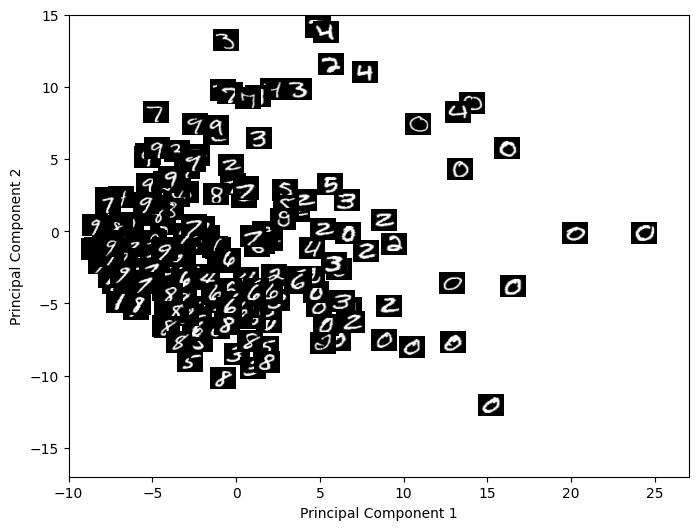

TypeError: unsupported format string passed to numpy.ndarray.__format__

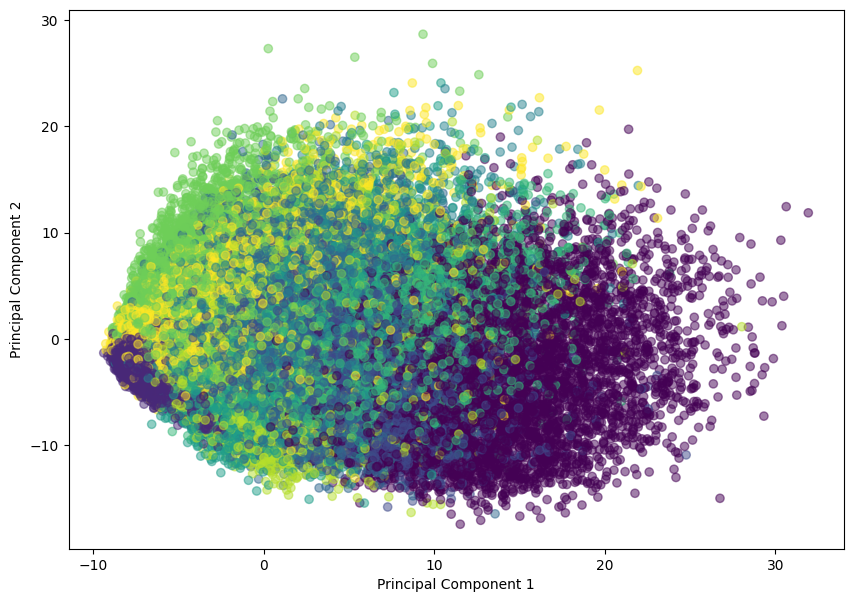

In [81]:
# Visualizziamo i risultati utilizzando le stesse funzioni viste in precedenza 
plot_pca_with_images(X, X_pca, y)
plot_pca_2d(X_pca, y, varianza)

# svolgimento...